## Generación de estímulo visual MTF

(Empecé haciendo la explicación en colab, pero me di cuenta que era ineficiente, por lo que a la mitad cambié a latex, una disculpa.)

Para generar esta función de manera adecuada primero va a ser necesario obtener dos valores a partir de la siguiente ecuación:

f(x) = sen(phi(x))

donde

phi(x) = beta * e^(alfa * x)

tal que

phi'(pi) = 2^n  los pixeles de nuestra imagen. (Consideraremos n=9, i.e., 512 pixeles), y phi'(0) = 1

Entonces consideremos el siguiente desarrollo algebraico para conseguir los valroes de alfa y beta:

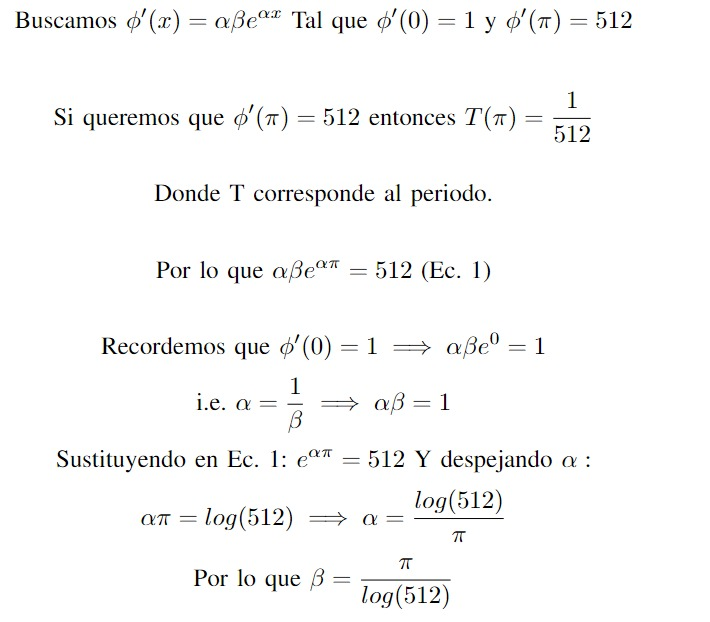



In [78]:
# Intento bueno definiendo la función de manera conjunta.

# Trabajemos con la función f(x, y) = g(y)h(x) donde
# g(y) = e^{-cy}, h(x) = sen(ae^{bx})
# Donde a = pi/ln(512), b = ln(512)/pi

import numpy as np
import math

def funchida(x, y):
    a = (math.pi) / (math.log(512))
    b = (math.log(512)) / (math.pi)
    c = 2

    h = np.sin(a * np.exp(b * x))
    g = np.exp(c * (np.pi - y))
    return h * g

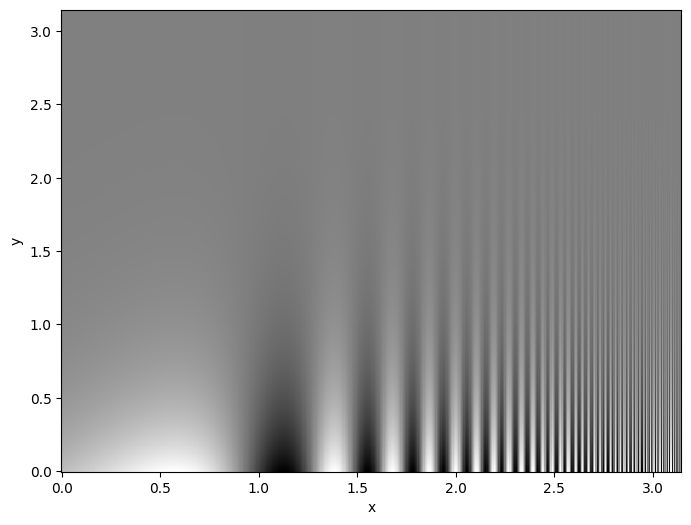

In [90]:
#Graficamos la función usando matplotlib
import matplotlib.pyplot as plt

# Valores a evaluar
x = np.linspace(0, math.pi, 512)
y = np.linspace(0, math.pi, 512)
X, Y = np.meshgrid(x, y)
Z = funchida(X, Y)

# Usamos un heatmap gris para que quede como lo visto en clase.
plt.figure(figsize=(8, 6))
plt.pcolormesh(X, Y, Z, cmap='gray')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

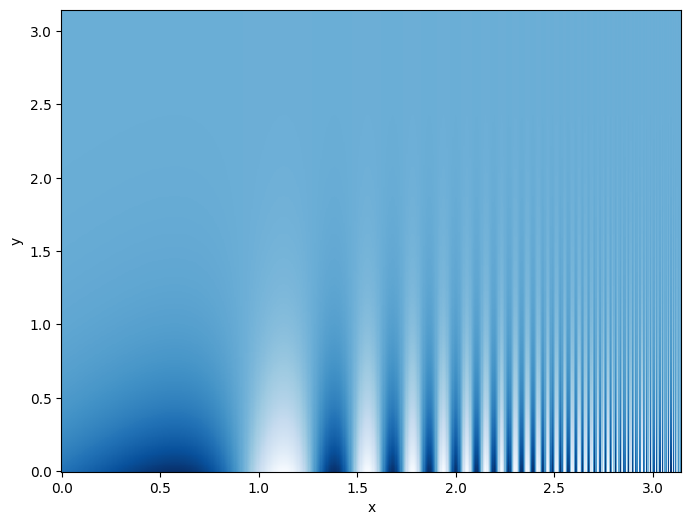

In [91]:
# Azul igual queda coqueto
plt.figure(figsize=(8, 6))
plt.pcolormesh(X, Y, Z, cmap='Blues')
plt.xlabel('x')
plt.ylabel('y')
plt.show()